In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
bond = pd.read_csv(r"E:\PythonCore\datafiles\jamesbond.csv")
bond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               26 non-null     object 
 1   Year               26 non-null     int64  
 2   Actor              26 non-null     object 
 3   Director           26 non-null     object 
 4   Box Office         26 non-null     float64
 5   Budget             26 non-null     float64
 6   Bond Actor Salary  18 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.5+ KB


In [4]:
bond.head()


,Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2
3,Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7
4,Casino Royale,1967,David Niven,Ken Hughes,315.0,85.0,NaN


In [5]:
## 8th row and 10th row
bond.iloc[8:10,[0,2]]

,Film,Actor
8,Live and Let Die,Roger Moore
9,The Man with the Golden Gun,Roger Moore


In [6]:
## get data where budget > 50

In [7]:
bond.iloc[:,0]

0                              Dr. No
1               From Russia with Love
2                          Goldfinger
3                         Thunderball
4                       Casino Royale
5                 You Only Live Twice
6     On Her Majesty's Secret Service
7                Diamonds Are Forever
8                    Live and Let Die
9         The Man with the Golden Gun
10               The Spy Who Loved Me
11                          Moonraker
12                 For Your Eyes Only
13              Never Say Never Again
14                          Octopussy
15                   A View to a Kill
16               The Living Daylights
17                    Licence to Kill
18                          GoldenEye
19                Tomorrow Never Dies
20            The World Is Not Enough
21                    Die Another Day
22                      Casino Royale
23                  Quantum of Solace
24                            Skyfall
25                            Spectre
Name: Film, 

In [8]:
mask = (bond.iloc[:,5]<20) &  (bond.iloc[:,1] > 1962)

In [9]:
bond[mask]
#bond[bond['Budget']<20]

,Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2


In [10]:
bond['Actor'].unique()

array(['Sean Connery', 'David Niven', 'George Lazenby', 'Roger Moore',
       'Timothy Dalton', 'Pierce Brosnan', 'Daniel Craig'], dtype=object)

In [11]:
bond['Actor'].nunique()

7

In [12]:
vals = bond['Actor'].value_counts()

In [13]:
vals

Roger Moore       7
Sean Connery      7
Daniel Craig      4
Pierce Brosnan    4
Timothy Dalton    2
George Lazenby    1
David Niven       1
Name: Actor, dtype: int64

In [14]:
vals.index

Index(['Roger Moore', 'Sean Connery', 'Daniel Craig', 'Pierce Brosnan',
       'Timothy Dalton', 'George Lazenby', 'David Niven'],
      dtype='object')

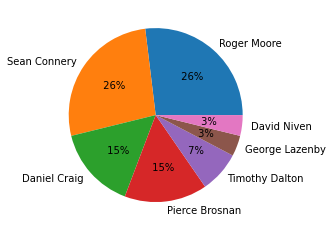

In [15]:
plt.pie(vals, labels=vals.index, autopct='% 0d%%');

In [16]:
# Top 2 Film that has earned the most
bond.sort_values(by = ['Year','Director'] , ascending=[False, True]).head(2)

,Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
25,Spectre,2015,Daniel Craig,Sam Mendes,726.7,206.3,NaN
24,Skyfall,2012,Daniel Craig,Sam Mendes,943.5,170.2,14.5


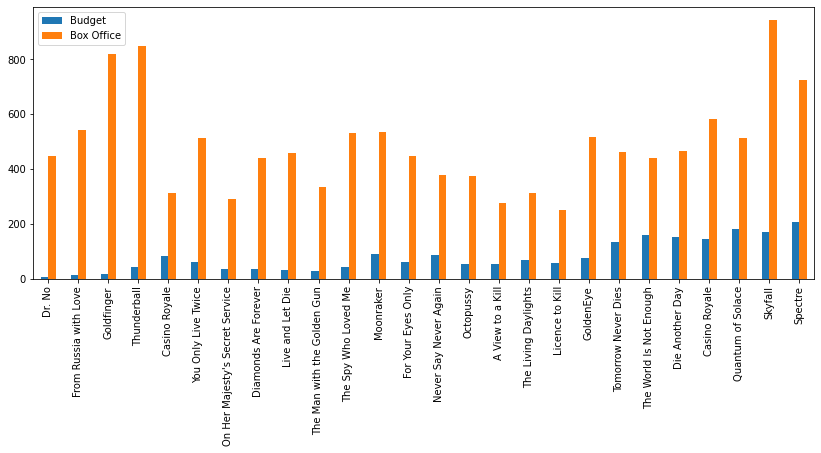

In [17]:
# box plot of Budget and Box Office
bond[['Budget','Box Office']].plot(kind='bar', figsize=(14,5));
plt.xticks(bond.index, bond['Film']);

In [18]:
sample = pd.DataFrame({'A': [10,20,np.nan], 
                 'B' : [200,300,400],
                 'C' : [1000,2000,3000]})
sample

,A,B,C
0,10.0,200,1000
1,20.0,300,2000
2,NaN,400,3000


In [19]:
#sample['D']='test'
sample['D'] = sample['C']-sample['B']
sample

,A,B,C,D
0,10.0,200,1000,800
1,20.0,300,2000,1700
2,NaN,400,3000,2600


In [20]:
#Top 2 films with greatest ROI
bond['ROI'] = (bond['Box Office']-bond['Budget'])/bond['Budget']
bond

,Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary,ROI
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6,63.114286
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6,42.158730
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2,43.107527
3,Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7,19.241050
4,Casino Royale,1967,David Niven,Ken Hughes,315.0,85.0,NaN,2.705882
5,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,514.2,59.9,4.4,7.584307
6,On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,291.5,37.3,0.6,6.815013
7,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,442.5,34.7,5.8,11.752161
8,Live and Let Die,1973,Roger Moore,Guy Hamilton,460.3,30.8,NaN,13.944805
9,The Man with the Golden Gun,1974,Roger Moore,Guy Hamilton,334.0,27.7,NaN,11.057762


In [21]:
bond.sort_values(by=['ROI'], ascending=False).head(2)

,Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary,ROI
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6,63.114286
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2,43.107527


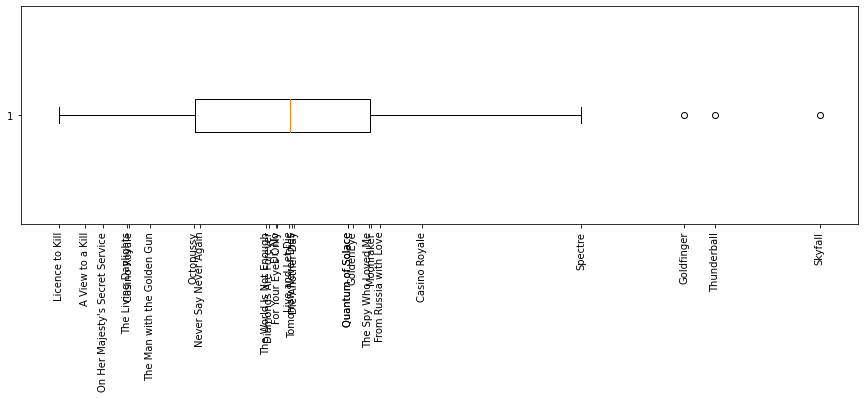

In [22]:
# Find out outliers for Box Office
plt.figure(figsize=(15,4))
plt.boxplot(bond['Box Office'], vert=False)
plt.xticks(bond['Box Office'], bond['Film'], rotation=90);

In [23]:
bond['Box Office'].describe()

count     26.000000
mean     491.611538
std      176.740396
min      250.900000
25%      375.350000
50%      461.750000
75%      534.500000
max      943.500000
Name: Box Office, dtype: float64

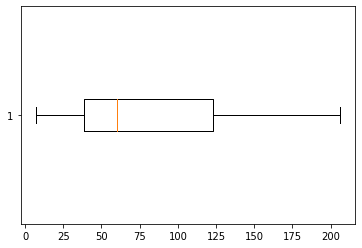

In [24]:
plt.boxplot(bond['Budget'], vert=False);

In [25]:
# Which films are outliers
bond.sort_values(by=['Box Office'], ascending=False).head(5)

,Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary,ROI
24,Skyfall,2012,Daniel Craig,Sam Mendes,943.5,170.2,14.5,4.543478
3,Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7,19.241050
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2,43.107527
25,Spectre,2015,Daniel Craig,Sam Mendes,726.7,206.3,NaN,2.522540
22,Casino Royale,2006,Daniel Craig,Martin Campbell,581.5,145.3,3.3,3.002065


In [26]:
# Box Office > Q3 + 1.5*IQR
IQR  = np.percentile(bond['Box Office'],75)-np.percentile(bond['Box Office'],25)
UB = round(np.percentile(bond['Box Office'],75) + 1.5*IQR,2)
mask = bond['Box Office'] >  UB
bond[mask]

,Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary,ROI
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2,43.107527
3,Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7,19.241050
24,Skyfall,2012,Daniel Craig,Sam Mendes,943.5,170.2,14.5,4.543478


In [27]:
# Box Office > Q3 + 1.5*IQR
bond_bo_info = bond['Box Office'].describe()
IQR  =bond_bo_info[6]-bond_bo_info[4]
UB = round(bond_bo_info[6] + 1.5*IQR,2)
mask = bond['Box Office'] >  UB
bond[mask]

,Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary,ROI
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2,43.107527
3,Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7,19.241050
24,Skyfall,2012,Daniel Craig,Sam Mendes,943.5,170.2,14.5,4.543478


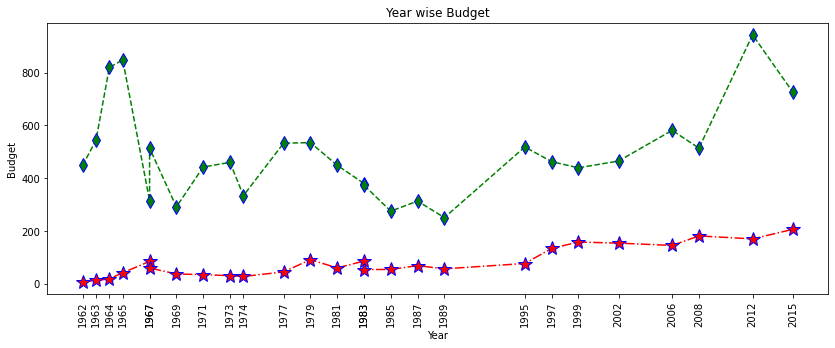

In [28]:
# Over the years how has budget changed
# Draw a line chart for Years on x axis and Budget on y axis
plt.figure(figsize=(14,5))
plt.plot(bond['Year'], bond['Budget'], marker='*',ms=15,  
         color='red', ls = '-.',mec='blue')
plt.plot(bond['Year'], bond['Box Office'], marker='d',ms=10,  
         color='g', ls = '--',mec='blue')
plt.xticks(bond['Year'], rotation=90)
plt.xlabel("Year")
plt.ylabel("Budget")
plt.title("Year wise Budget")
plt.show()

In [29]:
bond

,Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary,ROI
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6,63.114286
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6,42.158730
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2,43.107527
3,Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7,19.241050
4,Casino Royale,1967,David Niven,Ken Hughes,315.0,85.0,NaN,2.705882
5,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,514.2,59.9,4.4,7.584307
6,On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,291.5,37.3,0.6,6.815013
7,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,442.5,34.7,5.8,11.752161
8,Live and Let Die,1973,Roger Moore,Guy Hamilton,460.3,30.8,NaN,13.944805
9,The Man with the Golden Gun,1974,Roger Moore,Guy Hamilton,334.0,27.7,NaN,11.057762


# ways to use index location
df.iloc[rowslice][cols]
df.iloc[[rowindex]][cols]
df.iloc[[rowindex],[colindex]]
df.iloc[rowslice, colslice]

In [31]:
# rename columns names
# here I am removing space from columns
bond.rename(columns = {"Bond Actor Salary" : "BondActorSalary", 
                       "Box Office" : "BoxOffice"}, 
            inplace = True)

In [32]:
bond.columns

Index(['Film', 'Year', 'Actor', 'Director', 'BoxOffice', 'Budget',
       'BondActorSalary', 'ROI'],
      dtype='object')

In [33]:
bond['Film'].apply(len)

0      6
1     21
2     10
3     11
4     13
5     19
6     31
7     20
8     16
9     27
10    20
11     9
12    18
13    21
14     9
15    16
16    20
17    15
18     9
19    19
20    23
21    15
22    13
23    17
24     7
25     7
Name: Film, dtype: int64

In [34]:
def myfunc(r):
    if r.Actor == "Pierce Brosnan":        
        return "The best"
    elif r.Actor == "Roger Moore" and r.Budget > 40:
        return "Enjoyable"
    else:
        return "I have no clue"

In [35]:
## Select only Roger Moore films
bond['Remarks'] = bond.apply(myfunc, axis=1)
bond

,Film,Year,Actor,Director,BoxOffice,Budget,BondActorSalary,ROI,Remarks
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6,63.114286,I have no clue
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6,42.158730,I have no clue
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2,43.107527,I have no clue
3,Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7,19.241050,I have no clue
4,Casino Royale,1967,David Niven,Ken Hughes,315.0,85.0,NaN,2.705882,I have no clue
5,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,514.2,59.9,4.4,7.584307,I have no clue
6,On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,291.5,37.3,0.6,6.815013,I have no clue
7,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,442.5,34.7,5.8,11.752161,I have no clue
8,Live and Let Die,1973,Roger Moore,Guy Hamilton,460.3,30.8,NaN,13.944805,I have no clue
9,The Man with the Golden Gun,1974,Roger Moore,Guy Hamilton,334.0,27.7,NaN,11.057762,I have no clue


In [36]:
## Select only Roger Moore films
bond['Remarks'] = bond.apply(lambda r: "The best" if r.Actor == "Pierce Brosnan" else  "Enjoyable" if (r.Actor == "Roger Moore" and r.Budget > 40) else "I have no clue", axis=1)
bond.head(15)

,Film,Year,Actor,Director,BoxOffice,Budget,BondActorSalary,ROI,Remarks
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6,63.114286,I have no clue
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6,42.158730,I have no clue
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2,43.107527,I have no clue
3,Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7,19.241050,I have no clue
4,Casino Royale,1967,David Niven,Ken Hughes,315.0,85.0,NaN,2.705882,I have no clue
5,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,514.2,59.9,4.4,7.584307,I have no clue
6,On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,291.5,37.3,0.6,6.815013,I have no clue
7,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,442.5,34.7,5.8,11.752161,I have no clue
8,Live and Let Die,1973,Roger Moore,Guy Hamilton,460.3,30.8,NaN,13.944805,I have no clue
9,The Man with the Golden Gun,1974,Roger Moore,Guy Hamilton,334.0,27.7,NaN,11.057762,I have no clue


In [37]:
## Select only Roger Moore films
bond['Remarks'] = bond.apply(myfunc, axis=1)
bond

,Film,Year,Actor,Director,BoxOffice,Budget,BondActorSalary,ROI,Remarks
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6,63.114286,I have no clue
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6,42.158730,I have no clue
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2,43.107527,I have no clue
3,Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7,19.241050,I have no clue
4,Casino Royale,1967,David Niven,Ken Hughes,315.0,85.0,NaN,2.705882,I have no clue
5,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,514.2,59.9,4.4,7.584307,I have no clue
6,On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,291.5,37.3,0.6,6.815013,I have no clue
7,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,442.5,34.7,5.8,11.752161,I have no clue
8,Live and Let Die,1973,Roger Moore,Guy Hamilton,460.3,30.8,NaN,13.944805,I have no clue
9,The Man with the Golden Gun,1974,Roger Moore,Guy Hamilton,334.0,27.7,NaN,11.057762,I have no clue


Add a column Remarks and use following logic to add values
if actor == "Pierce Brosnan"        "The best"
actor == "Roger Moore" and budget > 40
        "Enjoyable"
"I have no clue"

In [38]:
c = np.array([[10,51,55], [56,5,2]])

In [39]:
np.where(c>50, 100, -100)

array([[-100,  100,  100],
       [ 100, -100, -100]])

In [40]:
# groupby and treatment of NA values

In [41]:
sample

,A,B,C,D
0,10.0,200,1000,800
1,20.0,300,2000,1700
2,NaN,400,3000,2600


In [42]:
sample.dropna()
# drops entire rows even if one column has NA values
# wherever NA values

,A,B,C,D
0,10.0,200,1000,800
1,20.0,300,2000,1700


In [55]:
sample.iloc[[1],[0]] = np.nan

In [56]:
sample

,A,B,C,D
0,10.0,200,1000,800
1,NaN,300,2000,1700
2,NaN,400,3000,2600


In [49]:
sample.dropna(axis=1, thresh=2)
# Require that many non-NA values.
# drops column where any value is NA

,A,B,C,D
0,10.0,200,1000,800
1,20.0,300,2000,1700
2,NaN,400,3000,2600


In [46]:
sample.fillna(value=sample['A'].mean())

,A,B,C,D
0,10.0,200,1000,800
1,20.0,300,2000,1700
2,15.0,400,3000,2600


In [57]:
# Create dataframe
data = {'Company':['RIL','RIL','TCS','TCS','ICICI','ICICI'],
       'Person':['Anushka','Ramdeo','Archana','Vineeta','Ritika','Sapna'],
       'Sales':[200,120,340,124,243,350]}
co_df =  pd.DataFrame(data)

In [58]:
co_df

,Company,Person,Sales
0,RIL,Anushka,200
1,RIL,Ramdeo,120
2,TCS,Archana,340
3,TCS,Vineeta,124
4,ICICI,Ritika,243
5,ICICI,Sapna,350


In [59]:
by_comp = co_df.groupby('Company')
type(by_comp)

pandas.core.groupby.generic.DataFrameGroupBy

In [64]:
by_comp.describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
ICICI     2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
RIL       2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
TCS       2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [65]:
by_comp.sum()

,Sales
Company,
ICICI,593
RIL,320
TCS,464


In [67]:
by_comp.groups

{'ICICI': [4, 5], 'RIL': [0, 1], 'TCS': [2, 3]}

In [ ]:
# Apply this on bond['Actor'] column
# How much has each Actor achieved on Box Office and How much was total salary

In [72]:
grpActor = bond.groupby('Actor')

In [76]:
grpActor[['BoxOffice', 'BondActorSalary']].sum()

,BoxOffice,BondActorSalary
Actor,,
Daniel Craig,2765.9,25.9
David Niven,315.0,0.0
George Lazenby,291.5,0.6
Pierce Brosnan,1886.6,46.5
Roger Moore,2960.7,16.9
Sean Connery,3997.8,20.3
Timothy Dalton,564.4,13.1


In [77]:
grpActor[['BoxOffice', 'BondActorSalary']].mean()

,BoxOffice,BondActorSalary
Actor,,
Daniel Craig,691.475000,8.633333
David Niven,315.000000,NaN
George Lazenby,291.500000,0.600000
Pierce Brosnan,471.650000,11.625000
Roger Moore,422.957143,8.450000
Sean Connery,571.114286,3.383333
Timothy Dalton,282.200000,6.550000


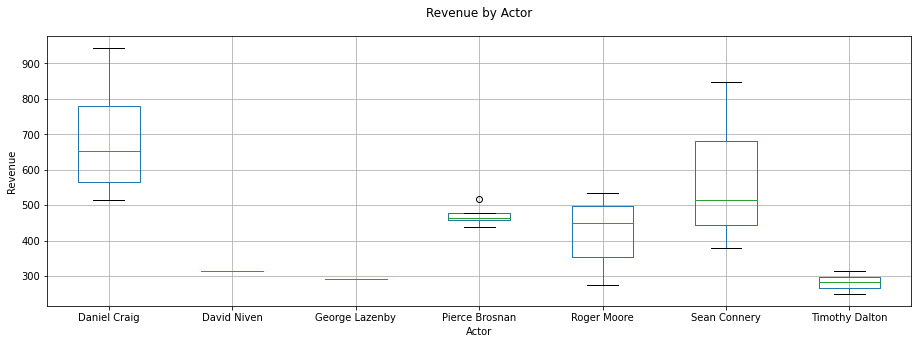

In [80]:
ax = bond.boxplot(column= 'BoxOffice', by='Actor', figsize=(15,5))
ax.set_title("")
ax.set_ylabel("Revenue")
ax.set_xlabel("Actor")
plt.suptitle("Revenue by Actor")
plt.grid(True)
plt.show()